
## Understanding K-Means Clustering

### Key Concepts
K-Means is a widely used unsupervised learning algorithm for clustering. Here's how it works:
1. Randomly initialize cluster centroids.
2. Assign each data point to the nearest centroid based on a distance metric (usually Euclidean distance).
3. Recalculate the centroids as the mean of the points in each cluster.
4. Repeat steps 2-3 until the centroids stabilize (convergence).

### Challenges of K-Means
- **Initialization Sensitivity**: Poor initialization can lead to suboptimal clustering. K-Means++ is a common improvement.
- **Fixed Number of Clusters**: Requires prior knowledge of the number of clusters (k).
- **Sensitivity to Outliers**: Outliers can disproportionately influence centroids.
    


## Advanced Concepts

### K-Means++ Initialization
To address the sensitivity to initialization, K-Means++ improves centroid initialization by:
1. Selecting the first centroid randomly from the data points.
2. Choosing subsequent centroids with probabilities proportional to their distance from the nearest existing centroid.

### Alternatives to K-Means
- **DBSCAN**: Density-based clustering algorithm that can identify clusters of arbitrary shapes and handle noise.
- **Hierarchical Clustering**: Builds a hierarchy of clusters using a tree structure.
    

C:\Users\DiSheng\anaconda3\envs\tf2.10-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DiSheng\anaconda3\envs\tf2.10-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DiSheng\anaconda3\envs\tf2.10-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DiSheng\anaconda3\envs\tf2.10-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: K

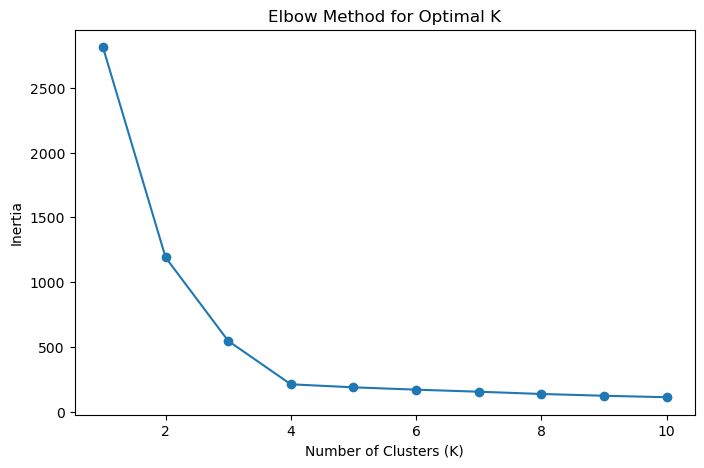

In [1]:

# Visualization: Elbow Method for Optimal K
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Elbow method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()
    


## Applying K-Means to a Real-World Dataset

We will use the **Iris dataset** to demonstrate K-Means clustering. This dataset contains measurements of 150 iris flowers across three species. The goal is to identify clusters that correspond to species.
    

C:\Users\DiSheng\anaconda3\envs\tf2.10-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DiSheng\anaconda3\envs\tf2.10-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


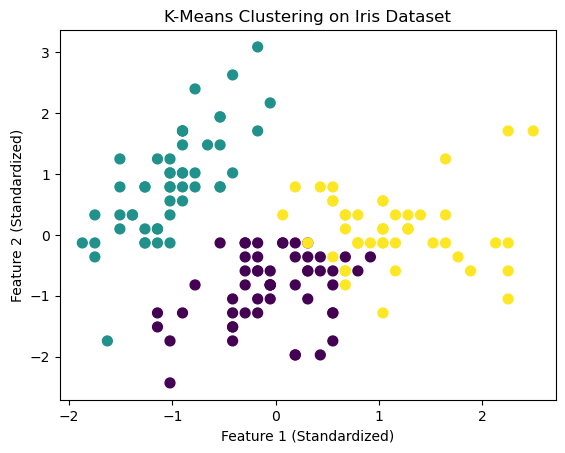

In [2]:

# Real-world dataset: Iris
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X_iris = StandardScaler().fit_transform(iris.data)

# K-Means clustering
kmeans_iris = KMeans(n_clusters=3, random_state=0).fit(X_iris)

# Visualize the clusters
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=kmeans_iris.labels_, cmap='viridis', s=50)
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()
    


## Comparison with DBSCAN

DBSCAN identifies clusters based on density rather than assuming spherical clusters. It can also detect outliers. Let's compare DBSCAN and K-Means on a synthetic dataset with varying densities.
    

C:\Users\DiSheng\anaconda3\envs\tf2.10-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DiSheng\anaconda3\envs\tf2.10-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


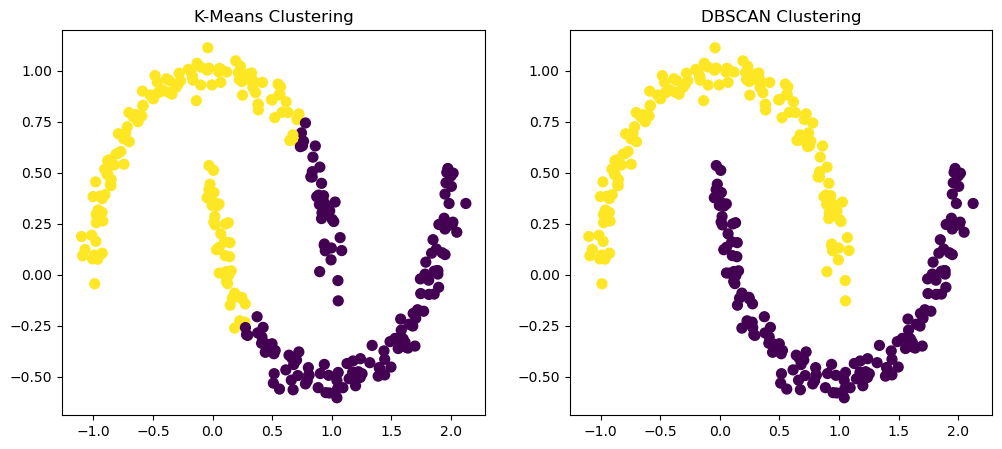

In [3]:

from sklearn.cluster import DBSCAN

# Synthetic dataset with varying densities
from sklearn.datasets import make_moons
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

# K-Means
kmeans_moons = KMeans(n_clusters=2, random_state=0).fit(X_moons)
labels_kmeans = kmeans_moons.labels_

# DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5).fit(X_moons)
labels_dbscan = dbscan.labels_

# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_kmeans, cmap='viridis', s=50)
axs[0].set_title('K-Means Clustering')

axs[1].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_dbscan, cmap='viridis', s=50)
axs[1].set_title('DBSCAN Clustering')

plt.show()
    


## Mathematical Formulation of K-Means

The K-Means algorithm minimizes the within-cluster sum of squares (WCSS), also called inertia. Mathematically, the objective function is:

\[
J = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2
\]

Where:
- \( k \): Number of clusters.
- \( C_i \): Data points in cluster \( i \).
- \( \mu_i \): Centroid of cluster \( i \).

### Key Hyperparameters
- **n_clusters**: Number of clusters to form.
- **init**: Method for initialization (e.g., `'random'`, `'k-means++'`).
- **max_iter**: Maximum number of iterations for convergence.
    


## Clustering Evaluation Metrics

To evaluate the quality of clusters, we use metrics like:

1. **Silhouette Score**: Measures how well data points fit within their clusters.
2. **Calinski-Harabasz Index**: Higher values indicate better-defined clusters.
    

In [4]:

from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
    

Silhouette Score: 0.33743423036703796
Calinski-Harabasz Index: 773.8885837748326



## Dimensionality Reduction for Visualization

We will use Principal Component Analysis (PCA) to reduce the dimensions of the Iris dataset and visualize it in 2D.
    

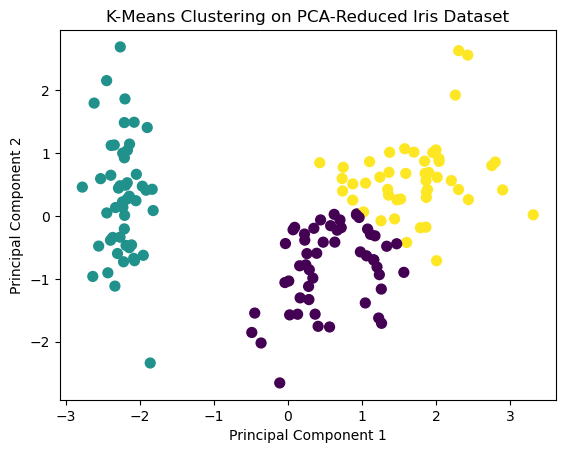

In [5]:

from sklearn.decomposition import PCA

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)

# Visualize PCA-reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_iris.labels_, cmap='viridis', s=50)
plt.title('K-Means Clustering on PCA-Reduced Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
    


## Real-World Application: Image Compression

K-Means can be used to compress images by reducing the number of colors. This is achieved by clustering pixel colors into a limited number of clusters.
    

C:\Users\DiSheng\anaconda3\envs\tf2.10-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


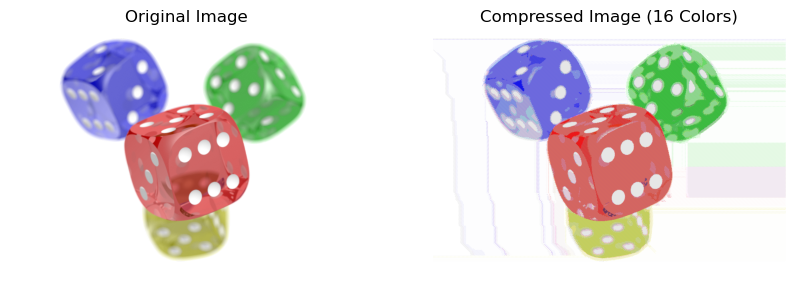

In [6]:

from skimage import io

# Load and reshape the image
image_url = 'https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png'
img = io.imread(image_url) / 255.0
img_reshaped = img.reshape(-1, 3)

# Apply K-Means for image compression
kmeans_img = KMeans(n_clusters=16, random_state=0).fit(img_reshaped)
compressed_img = kmeans_img.cluster_centers_[kmeans_img.labels_].reshape(img.shape)

# Visualize the compressed image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_img)
plt.title('Compressed Image (16 Colors)')
plt.axis('off')
plt.show()
    


## Scalability: Mini-Batch K-Means

Mini-Batch K-Means is a variant of K-Means that processes small random subsets (batches) of the dataset at each iteration, making it faster on large datasets.
    

C:\Users\DiSheng\anaconda3\envs\tf2.10-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\DiSheng\anaconda3\envs\tf2.10-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


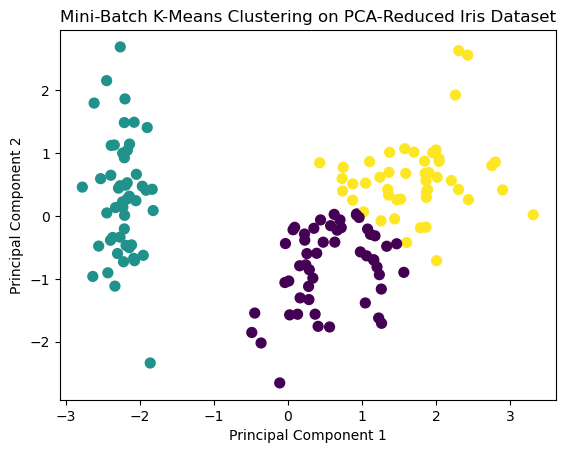

In [7]:

from sklearn.cluster import MiniBatchKMeans

# Apply Mini-Batch K-Means
mini_batch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=0).fit(X_iris)

# Visualize results with Mini-Batch K-Means
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mini_batch_kmeans.labels_, cmap='viridis', s=50)
plt.title('Mini-Batch K-Means Clustering on PCA-Reduced Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
    